In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# To create interactive plots
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

# To do the Statistical test
from scipy import stats
from scipy.stats import levene
from statsmodels.stats.diagnostic import kstest_normal
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import MultiComparison, pairwise_tukeyhsd

In [2]:
df = pd.read_csv('Netflix Engagement (plus).csv')
df

,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,Key Words,Description
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,7696.0,6.0,"['Biography', 'Drama', 'History']","persian empire,empire,5th century b.c.,achaeme...",NaN
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000,5216.0,5.7,"['Comedy', 'Drama', 'Romance']","producer,three word title,headstrong,arranged ...",The film follows headstrong Ginny who meets Su...
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000,11869.0,8.4,['Short'],NaN,NaN
3,Wednesday: Season 1,Yes,2022-11-23,507700000,NaN,NaN,['Talk-Show'],youtube video,MsMojo counts down the top 10 Wednesday (2022)...
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000,50077.0,7.4,"['Drama', 'History', 'Romance']","prequel,queen,historical,england,queen charlot...","Betrothed against her will to King George, you..."
...,...,...,...,...,...,...,...,...,...
18327,راس السنة,No,NaN,100000,383.0,4.8,['Drama'],live,A tale of different people whose lives intertw...
18328,心が叫びたがってるんだ。,No,NaN,100000,6209.0,7.3,"['Animation', 'Drama', 'Family']","anime animation,anime",A young girl had her voice magically taken awa...
18329,두근두근 내 인생,No,NaN,100000,NaN,NaN,NaN,NaN,NaN
18330,라디오 스타,No,NaN,100000,NaN,NaN,NaN,NaN,NaN


# Data Pre-Processing

In [3]:
# Missing Value
df.dropna(subset=['Rating'], inplace = True)
df.dropna(subset=['Genre'], inplace = True)

# Duplicated Value
df.drop_duplicates(inplace = True)

# Reset Index
df.reset_index(drop=True, inplace = True)


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14135 entries, 0 to 14134
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                14135 non-null  object 
 1   Available Globally?  14135 non-null  object 
 2   Release Date         3572 non-null   object 
 3   Hours Viewed         14135 non-null  int64  
 4   Number of Ratings    14135 non-null  float64
 5   Rating               14135 non-null  float64
 6   Genre                14135 non-null  object 
 7   Key Words            12271 non-null  object 
 8   Description          9752 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 994.0+ KB


In [4]:
# 显示非数值型列的摘要统计信息
print("Non-numeric columns:")
df.describe(include='object')


Non-numeric columns:


,Title,Available Globally?,Release Date,Genre,Key Words,Description
count,14135,14135,3572,14135,12271,9752
unique,14091,2,1440,633,9478,8233
top,Perfect Strangers // Perfetti sconosciuti,No,2020-03-20,['Comedy'],"tv special,stand up comedy,stand up comedy spe...","Celebrate the enduring, powerful character of ..."
freq,3,10802,14,976,79,62


In [5]:
# 将浮点数格式设置为固定小数点格式，而不是科学计数法
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# 显示数值型列的描述统计信息，避免科学符号表示法
numeric_summary = df.describe(include='number')
print("Numeric columns:")
numeric_summary


Numeric columns:


,Hours Viewed,Number of Ratings,Rating
count,14135.00,14135.00,14135.00
mean,4592147.15,46373.06,6.51
std,18048924.81,149028.82,1.23
min,100000.00,5.00,1.20
25%,200000.00,347.00,5.80
50%,600000.00,2620.00,6.60
75%,2900000.00,19614.00,7.30
max,812100000.00,2829797.00,10.00


# Data Processing - Number of Ratings

 - 只拿評分筆數超過100,000筆的資料

In [6]:
df = df[df['Number of Ratings']>=100000]
df.reset_index(drop=True, inplace = True)
df

,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,Key Words,Description
0,Extraction 2,Yes,2023-06-16,201800000,136009.00,7.00,"['Action', 'Thriller']","assassin,rescue,escape,mercenary,prison riot",After barely surviving his grievous wounds fro...
1,Shadow and Bone: Season 2,Yes,2023-03-16,192900000,111361.00,7.60,"['Action', 'Adventure', 'Drama']","magic,power,young woman,soldier,gay man",Dark forces conspire against orphan mapmaker A...
2,Emily in Paris: Season 3,Yes,2022-12-21,161100000,112694.00,6.90,"['Comedy', 'Drama', 'Romance']","female protagonist,character name in series ti...",A young American woman from the Midwest is hir...
3,Alice in Borderland: Season 2 // 今際の国のアリス: シーズン2,Yes,2022-12-22,157600000,119246.00,6.20,"['Adventure', 'Family', 'Fantasy']","alice character,caterpillar character,the mad ...",NaN
4,Glass Onion: A Knives Out Mystery,Yes,2022-12-23,142900000,419661.00,7.10,"['Comedy', 'Crime', 'Drama']","sequel,detective,benoit blanc character,twin s...",NaN
...,...,...,...,...,...,...,...,...,...
1562,Voices of the New Gen // เสียง (ไม่) เงียบ 2022,No,NaN,100000,182145.00,5.80,"['Action', 'Adventure', 'Fantasy']","library,year 1899,steampunk,mina murray charac...","In an alternate Victorian Age world, a group o..."
1563,Wall // Wycieczka,No,NaN,100000,163100.00,7.30,"['Crime', 'Drama']","capitalism,1980s,wall street manhattan new yor...",An impatient young stockbroker is willing to d...
1564,What Happened to Mr. Cha? // 차인표,Yes,2021-01-01,100000,131713.00,6.80,"['Action', 'Crime', 'Fantasy']","overpopulation,one child policy,actress playin...",NaN
1565,Women´s Revenge // Ženská pomsta,No,NaN,100000,350677.00,7.90,"['Action', 'Adventure', 'Comedy']","based on comic,god complex,raccoon,guardians o...","Still reeling from the loss of Gamora, Peter Q..."


- 畫出 boxplot 觀察其分佈

In [7]:
# Get data
data = df['Number of Ratings'].value_counts().sort_index(ascending=False)

# Create trace
trace = go.Box(y=df['Number of Ratings'], name='Number of Ratings Distribution', marker=dict(color='#db0000'))

# Create layout
layout = dict(title='Distribution Of {} Netflix-Ratings'.format(len(df)),
              yaxis=dict(title='Rating'))

# Create plot
fig = go.Figure(data=[trace], layout=layout)
fig.show()

- 印出 five number 觀察其分佈

In [8]:
# 显示数值型列的描述统计信息，避免科学符号表示法
numeric_summary = df.describe(include='number')
print("Numeric columns:")
numeric_summary

Numeric columns:


,Hours Viewed,Number of Ratings,Rating
count,1567.00,1567.00,1567.00
mean,6614486.28,334492.98,7.04
std,14979063.32,322422.83,0.86
min,100000.00,100298.00,2.80
25%,450000.00,145054.50,6.45
50%,1900000.00,220982.00,7.00
75%,6400000.00,384170.50,7.65
max,201800000.00,2829797.00,9.30


# Data Processing - Rating

In [9]:
# Get data
data = df['Rating'].value_counts().sort_index(ascending=False)

# Create trace
trace = go.Bar(x = data.index,
               text = ['{:.1f} %'.format(val) for val in (data.values / df.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#000000'),
               y = data.values,
               marker = dict(color = '#db0000'))
# Create layout
layout = dict(title = 'Distribution Of {} Netflix-Ratings'.format(df.shape[0]),
              xaxis = dict(title = 'Rating'),
              yaxis = dict(title = 'Count'))
# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

# Data Processing - Genres

- 計算各類型的數量

In [10]:
dic_genre2num = {}
for index, genres in enumerate(df['Genre']):
    genres = eval(genres)
    for genre in genres:
        if genre in dic_genre2num.keys():
            dic_genre2num[genre] += 1
        else:
            dic_genre2num[genre] = 1

# dic_genre2num

- 畫出 bar chart 觀察各類型之數量

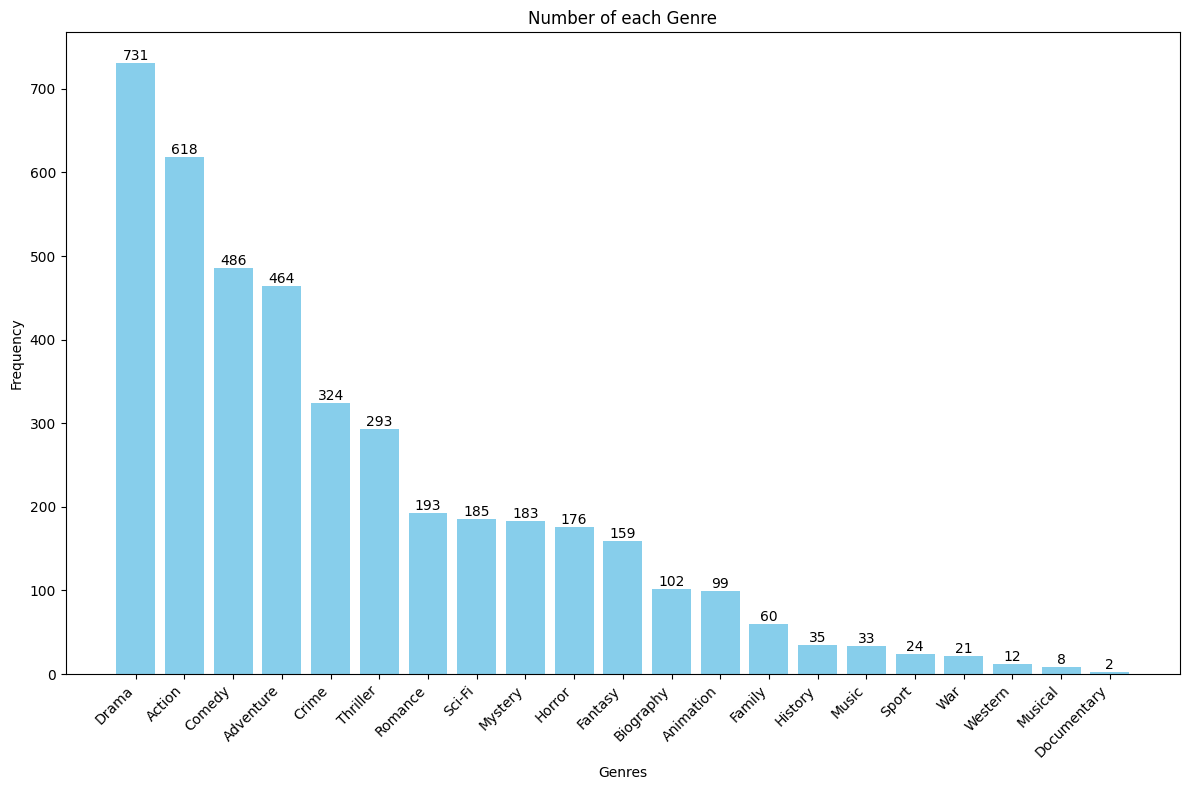

In [11]:
# 將類別和值配對，然後依照值的大小排序
sorted_data = sorted(zip(dic_genre2num.keys(), dic_genre2num.values()), key=lambda x: x[1], reverse=True)
sorted_categories, sorted_values = zip(*sorted_data)

# 繪製 bar chart
plt.figure(figsize=(12,8))  # 設置圖表大小（選擇性）
bars = plt.bar(sorted_categories, sorted_values, color='skyblue')  # 繪製 bar chart，指定顏色

# 加上標題與標籤
plt.title('Number of each Genre')  # 圖表標題
plt.xlabel('Genres')  # x 軸標籤
plt.ylabel('Frequency')  # y 軸標籤

# 調整 X 軸標籤的角度
plt.xticks(rotation=45, ha='right')  # 將 X 軸標籤逆時針旋轉45度，並靠右對齊

# 顯示數值標籤
for bar, value in zip(bars, sorted_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             str(value), ha='center', va='bottom')

# 顯示圖表
plt.tight_layout()  # 調整佈局，避免標籤被截斷
plt.show()

- 將各類型轉成 One-Hot Encoding的形式

In [12]:
dic_genre2onehot = {}
for genre_name in dic_genre2num.keys():
    lst = []

    # build a list to save one-hot encoding of each genre
    for index, genres in enumerate(df['Genre']):
        genres = eval(genres)
        lst.append(1) if genre_name in genres else lst.append(0)

    dic_genre2onehot[genre_name] = lst

df_genre2onehot = pd.DataFrame(dic_genre2onehot)
df_genre2onehot

,Action,Thriller,Adventure,Drama,Comedy,Romance,Family,Fantasy,Crime,Horror,...,Animation,Biography,Sci-Fi,Music,Sport,Western,History,War,Musical,Documentary
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1563,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1564,1,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1565,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# # 對每一列進行加總
# column_sums = df_genre2onehot.sum(axis=0)

# # 顯示結果
# print(column_sums)

- 合併資料

In [14]:
df = pd.concat([df, df_genre2onehot], axis=1)
df

,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,Key Words,Description,Action,...,Animation,Biography,Sci-Fi,Music,Sport,Western,History,War,Musical,Documentary
0,Extraction 2,Yes,2023-06-16,201800000,136009.00,7.00,"['Action', 'Thriller']","assassin,rescue,escape,mercenary,prison riot",After barely surviving his grievous wounds fro...,1,...,0,0,0,0,0,0,0,0,0,0
1,Shadow and Bone: Season 2,Yes,2023-03-16,192900000,111361.00,7.60,"['Action', 'Adventure', 'Drama']","magic,power,young woman,soldier,gay man",Dark forces conspire against orphan mapmaker A...,1,...,0,0,0,0,0,0,0,0,0,0
2,Emily in Paris: Season 3,Yes,2022-12-21,161100000,112694.00,6.90,"['Comedy', 'Drama', 'Romance']","female protagonist,character name in series ti...",A young American woman from the Midwest is hir...,0,...,0,0,0,0,0,0,0,0,0,0
3,Alice in Borderland: Season 2 // 今際の国のアリス: シーズン2,Yes,2022-12-22,157600000,119246.00,6.20,"['Adventure', 'Family', 'Fantasy']","alice character,caterpillar character,the mad ...",NaN,0,...,0,0,0,0,0,0,0,0,0,0
4,Glass Onion: A Knives Out Mystery,Yes,2022-12-23,142900000,419661.00,7.10,"['Comedy', 'Crime', 'Drama']","sequel,detective,benoit blanc character,twin s...",NaN,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,Voices of the New Gen // เสียง (ไม่) เงียบ 2022,No,NaN,100000,182145.00,5.80,"['Action', 'Adventure', 'Fantasy']","library,year 1899,steampunk,mina murray charac...","In an alternate Victorian Age world, a group o...",1,...,0,0,0,0,0,0,0,0,0,0
1563,Wall // Wycieczka,No,NaN,100000,163100.00,7.30,"['Crime', 'Drama']","capitalism,1980s,wall street manhattan new yor...",An impatient young stockbroker is willing to d...,0,...,0,0,0,0,0,0,0,0,0,0
1564,What Happened to Mr. Cha? // 차인표,Yes,2021-01-01,100000,131713.00,6.80,"['Action', 'Crime', 'Fantasy']","overpopulation,one child policy,actress playin...",NaN,1,...,0,0,0,0,0,0,0,0,0,0
1565,Women´s Revenge // Ženská pomsta,No,NaN,100000,350677.00,7.90,"['Action', 'Adventure', 'Comedy']","based on comic,god complex,raccoon,guardians o...","Still reeling from the loss of Gamora, Peter Q...",1,...,0,0,0,0,0,0,0,0,0,0


- 將各類型之評分資料取出

In [15]:
dic_g2rating = {}
for genre in dic_genre2num.keys():
    dic_g2rating[genre] = df[df[genre]==1]['Rating'].values
dic_g2rating

{'Action': array([7. , 7.6, 7.6, 6. , 6.8, 6.3, 6.7, 7.2, 6.6, 9.3, 8.2, 5.2, 9.3,
        7.2, 9.3, 6.1, 6.7, 7.6, 6.5, 7.3, 6.9, 6.6, 9. , 8.2, 6.7, 7.8,
        6. , 7.5, 6.7, 6.2, 7.1, 5.8, 7.7, 6.5, 6.3, 6.2, 7.9, 7.4, 7.3,
        7.2, 6.6, 7. , 6.3, 5.6, 6.5, 5.2, 6.4, 6.2, 7.4, 6.3, 6.6, 7.8,
        5.6, 6.9, 7.9, 7.9, 7.8, 9. , 7.4, 9. , 5.8, 6.6, 7.6, 8.2, 5.9,
        8.1, 6.3, 6.6, 5.5, 6.6, 6.7, 7.5, 7.2, 6.8, 7.4, 6.3, 7.3, 6.4,
        7. , 8.8, 6.2, 7.1, 7.6, 7. , 5.7, 6.6, 7.4, 7.4, 6.7, 7.4, 8.5,
        6.3, 6.6, 6.6, 5.7, 6.1, 7.3, 7.4, 7.2, 5.6, 5.6, 7.2, 5.9, 7.8,
        6.9, 7. , 8.4, 5.4, 7. , 7.4, 5.1, 7.6, 6.4, 6.9, 5.8, 8. , 5.3,
        9. , 5.6, 6.5, 5.2, 5.5, 9. , 7.3, 6.5, 8.2, 7.7, 5.9, 5.6, 6.1,
        6.7, 7.6, 7.5, 6.4, 8.3, 5.2, 5.9, 6.5, 7.2, 6.7, 5.3, 6.6, 5.6,
        6.2, 4. , 6.1, 6.6, 6.1, 6.2, 6.7, 6.5, 6.9, 5.6, 6.5, 8. , 7.3,
        6.4, 7.8, 8.5, 7.6, 7. , 6.1, 6.3, 8.8, 7.1, 8. , 7.3, 6.6, 6.4,
        6.7, 6.2, 7. , 7.8, 6.5, 6.1, 6.4

- 計算各類型之評分的平均數、標準差、筆數

In [16]:
dic_g2ratingSTAT = {}
for genre in dic_genre2num.keys():
    mean = df[df[genre]==1]['Rating'].mean()
    std   = df[df[genre]==1]['Rating'].std()
    num  = len(df[df[genre]==1]['Rating'])
    dic_g2ratingSTAT[genre] = {'mean':mean, 'std':std, 'num':num}

# 將類別和值配對，然後依照值的大小排序
sorted_nested_dict = dict(sorted(dic_g2ratingSTAT.items(), key=lambda x: list(x[1].values())[0], reverse=True))

sorted_nested_df = pd.DataFrame.from_dict(sorted_nested_dict, orient='index')
sorted_nested_df

,mean,std,num
Western,7.64,0.88,12
War,7.63,0.74,21
History,7.52,0.49,35
Biography,7.46,0.69,102
Animation,7.40,0.93,99
Drama,7.37,0.77,731
Musical,7.22,0.49,8
Family,7.17,0.83,60
Crime,7.16,0.82,324
Sport,7.12,0.68,24


In [17]:
sample_size = 20

dic_g2rating_sample = {}
for genre in dic_genre2num.keys():
    if len(df[df[genre]==1]['Rating'].values) >= sample_size:
        sample_data = df[df[genre]==1]['Rating'].sample(n=sample_size, random_state=42) 
        dic_g2rating_sample[genre] = sample_data.values
dic_g2rating_sample

{'Action': array([6.3, 7.8, 7.6, 6.3, 7.4, 9. , 6.6, 6.5, 6.2, 6.5, 6.6, 6.2, 7.1,
        7.6, 7.6, 6.9, 6.5, 5.1, 6.4, 5.6]),
 'Thriller': array([7.1, 6.2, 7.3, 7.5, 6.4, 6.8, 6.3, 7.4, 5.2, 7.7, 6.5, 5.6, 7.8,
        6.5, 6.6, 6.4, 6.7, 8.1, 8.1, 6.8]),
 'Adventure': array([7.9, 6.5, 7. , 7.4, 5.7, 7. , 6.1, 7.8, 6.3, 6.8, 7.9, 7.1, 9. ,
        7.5, 7.9, 7.5, 7.9, 5.2, 6.4, 7.6]),
 'Drama': array([7. , 8.1, 7.5, 8.1, 7.3, 6.7, 6.6, 6.4, 7.7, 8.1, 7.1, 6.1, 6.5,
        7.3, 7.1, 7.3, 8.7, 7.9, 7.4, 9. ]),
 'Comedy': array([7.5, 7.5, 6.2, 6.5, 6.3, 7.3, 7. , 6.6, 7.2, 6.2, 6.5, 6.3, 6.9,
        6.3, 7.9, 7.9, 7.3, 6.9, 7.8, 6.1]),
 'Romance': array([7.1, 7.7, 7.7, 7.6, 7.8, 6.6, 6.2, 7.3, 7. , 8.8, 6.6, 6.1, 6.4,
        6.8, 7.2, 7.2, 7. , 6.9, 6.1, 5.8]),
 'Family': array([6.2, 7.4, 8.3, 8.1, 8.6, 7. , 8.1, 7.7, 7.5, 6.9, 7.4, 7.9, 7.1,
        7.6, 7.1, 6.8, 6.6, 7.9, 7.6, 6.2]),
 'Fantasy': array([7.8, 6.3, 6.5, 4.3, 7.5, 6.2, 6.9, 6.5, 6.1, 6.9, 4.9, 8.6, 7.5,
        6.9, 8.

In [18]:
dic_g2ratingSTAT = {}
for genre in dic_g2rating_sample.keys():
    mean = dic_g2rating_sample[genre].mean()
    std   = dic_g2rating_sample[genre].std()
    num  = len(dic_g2rating_sample[genre])
    dic_g2ratingSTAT[genre] = {'mean':mean, 'std':std, 'num':num}

# 將類別和值配對，然後依照值的大小排序
sorted_nested_dict = dict(sorted(dic_g2ratingSTAT.items(), key=lambda x: list(x[1].values())[0], reverse=True))

sorted_nested_df = pd.DataFrame.from_dict(sorted_nested_dict, orient='index')
sorted_nested_df

,mean,std,num
War,7.60,0.73,20
History,7.54,0.49,20
Family,7.40,0.65,20
Drama,7.40,0.74,20
Animation,7.30,0.96,20
Music,7.25,0.66,20
Biography,7.23,0.80,20
Mystery,7.21,0.70,20
Adventure,7.12,0.88,20
Sport,7.10,0.52,20


# One-way ANOVA

- Levene's test

In [19]:
groups = []
for genre, rating in dic_g2rating_sample.items():
     groups.append(rating)
     
# 执行 Levene 检验
statistic, p_value = levene(*groups)

# 输出 Levene 检验的统计量和 p-value
print("Levene test statistic:", statistic)
print("P-value:", p_value)

# 判断是否拒绝原假设（方差相等）
alpha = 0.05  # 设置显著性水平
if p_value < alpha:
    print("拒绝原假设，表示组间方差不相等")
else:
    print("接受原假设，表示组间方差相等")

Levene test statistic: 1.0380362671384349
P-value: 0.41575749400935963
接受原假设，表示组间方差相等


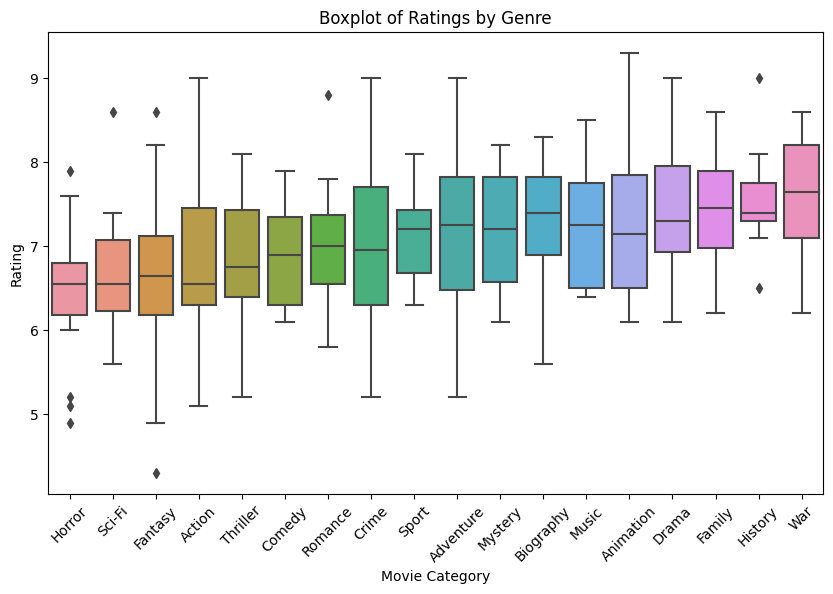

In [20]:
# 将字典数据转换为 DataFrame
df_sample = pd.DataFrame.from_dict(dic_g2rating_sample)

sorted_categories = df_sample.mean().sort_values().index.tolist()
df_sort = df_sample.reindex(columns=sorted_categories)

# 使用 Seaborn 绘制箱线图
plt.figure(figsize=(10, 6))  # 设置图的大小
sns.boxplot(data=df_sort)
plt.xlabel('Movie Category')  # 设置 x 轴标签
plt.ylabel('Rating')  # 设置 y 轴标签
plt.title('Boxplot of Ratings by Genre')  # 设置图的标题
plt.xticks(rotation = 45)
plt.show()

- Normality test

In [21]:
# 將資料攤平
flattened_data = [item for sublist in groups for item in sublist]

# 执行 Shapiro-Wilk 检定，检验样本数据是否符合正态分布
statistic, p_value = stats.shapiro(flattened_data)

# 输出 Shapiro-Wilk 检定的结果
print("Shapiro-Wilk test statistic:", statistic)
print("P-value:", p_value)

Shapiro-Wilk test statistic: 0.9922012090682983
P-value: 0.056352365761995316


In [22]:
# 执行 KS 检定，检验样本数据是否符合正态分布
normality_test = stats.kstest(flattened_data, 'norm')

# 输出 KS 检定的结果
print("KS test statistic:", normality_test.statistic)
print("P-value:", normality_test.pvalue)

KS test statistic: 0.999991460094529
P-value: 0.0


In [23]:
# 执行 Anderson-Darling 检定，检验样本数据是否符合正态分布
result = stats.anderson(flattened_data, dist='norm')

# 输出 Anderson-Darling 检定的结果
print("Anderson-Darling test statistic:", result.statistic)
print("Anderson-Darling test p-value:", result.critical_values[2])

Anderson-Darling test statistic: 0.9517839025571675
Anderson-Darling test p-value: 0.779


In [24]:
# 执行 Cramér-von Mises 检定，检验样本数据是否符合正态分布
cvm_test_result = kstest_normal(flattened_data, dist='norm')

# 输出 Cramér-von Mises 检定的结果
print("Cramér-von Mises test statistic:", cvm_test_result[0])
print("P-value:", cvm_test_result[1])

Cramér-von Mises test statistic: 0.0704305976963896
P-value: 0.0009999999999998899


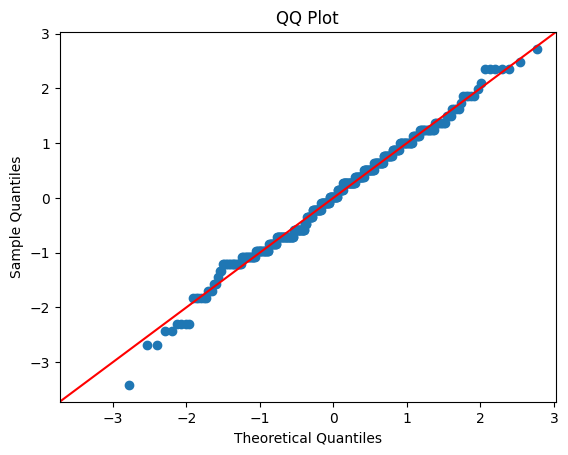

In [25]:
# 计算均值和标准差
sample_data = np.array(flattened_data)

mean = np.mean(sample_data)
std_dev = np.std(sample_data)

# 对数据进行标准化
standardized_data = (sample_data - mean) / std_dev

# 绘制 QQ 图
fig = sm.qqplot(standardized_data, line ='45')
plt.title('QQ Plot')  # 设置图的标题
plt.show()

In [26]:
# Get data
data = pd.Series(flattened_data).value_counts().sort_index(ascending=False)

# Create trace
trace = go.Bar(x = data.index,
               text = ['{:.1f} %'.format(val) for val in (data.values / df.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#000000'),
               y = data.values,
               marker = dict(color = '#db0000'))
# Create layout
layout = dict(title = 'Distribution Of {} Netflix-Ratings'.format(df.shape[0]),
              xaxis = dict(title = 'Rating'),
              yaxis = dict(title = 'Count'))
# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

- Finally ANOVA

In [27]:
# 执行单因素方差分析 (One-way ANOVA)
f_statistic, p_value = f_oneway(*groups)

# 输出方差分析的结果
print("F-statistic:", f_statistic)
print("P-value:", p_value)

F-statistic: 3.3978638364583307
P-value: 8.170297928164354e-06


# Post-Hoc Analysis

In [28]:
dic = {}
lst0 = []
lst1 = []

for genre in df_sort.columns:
    lst0.extend([genre]*sample_size)
    lst1.extend(df_sort[genre])

df_sort_gr = pd.DataFrame({'genre':lst0, 'ratings':lst1})
df_sort_gr

,genre,ratings
0,Horror,6.80
1,Horror,6.50
2,Horror,6.60
3,Horror,6.10
4,Horror,5.20
...,...,...
355,War,8.10
356,War,7.50
357,War,7.10
358,War,8.20


   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
   Action Adventure    0.335 0.9965 -0.5251  1.1951  False
   Action Animation     0.51 0.8233 -0.3501  1.3701  False
   Action Biography     0.44 0.9429 -0.4201  1.3001  False
   Action    Comedy     0.12    1.0 -0.7401  0.9801  False
   Action     Crime    0.255 0.9999 -0.6051  1.1151  False
   Action     Drama    0.605 0.5527 -0.2551  1.4651  False
   Action    Family     0.61  0.537 -0.2501  1.4701  False
   Action   Fantasy    -0.13    1.0 -0.9901  0.7301  False
   Action   History     0.75 0.1761 -0.1101  1.6101  False
   Action    Horror    -0.32 0.9979 -1.1801  0.5401  False
   Action     Music    0.465 0.9098 -0.3951  1.3251  False
   Action   Mystery    0.415 0.9663 -0.4451  1.2751  False
   Action   Romance    0.205    1.0 -0.6551  1.0651  False
   Action    Sci-Fi    -0.16    1.0 -1.0201  0.7001  Fal

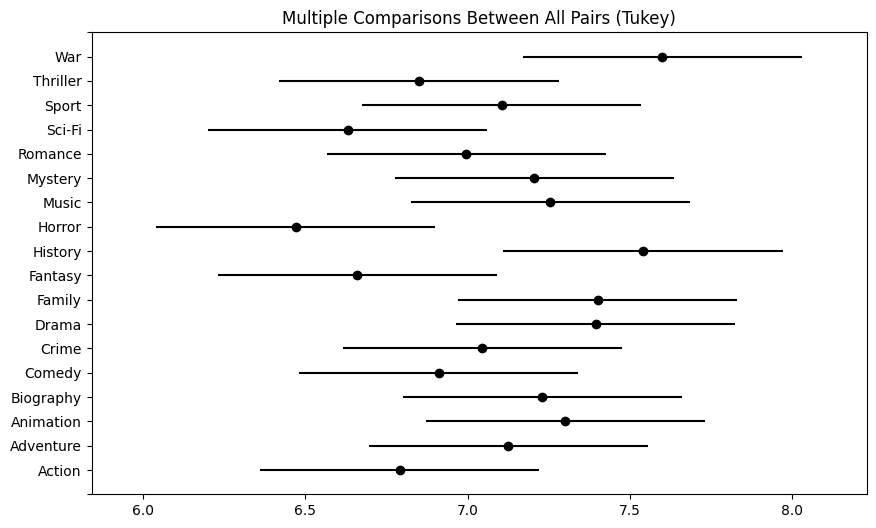

In [29]:
# Assuming 'score' contains your scores and 'genre' contains corresponding genre labels
mc = MultiComparison(df_sort_gr['ratings'], df_sort_gr['genre'])
results = mc.tukeyhsd()
print(results)

# If you want to plot the results
print(results.plot_simultaneous())

In [30]:
df_sort.columns

Index(['Horror', 'Sci-Fi', 'Fantasy', 'Action', 'Thriller', 'Comedy',
       'Romance', 'Crime', 'Sport', 'Adventure', 'Mystery', 'Biography',
       'Music', 'Animation', 'Drama', 'Family', 'History', 'War'],
      dtype='object')

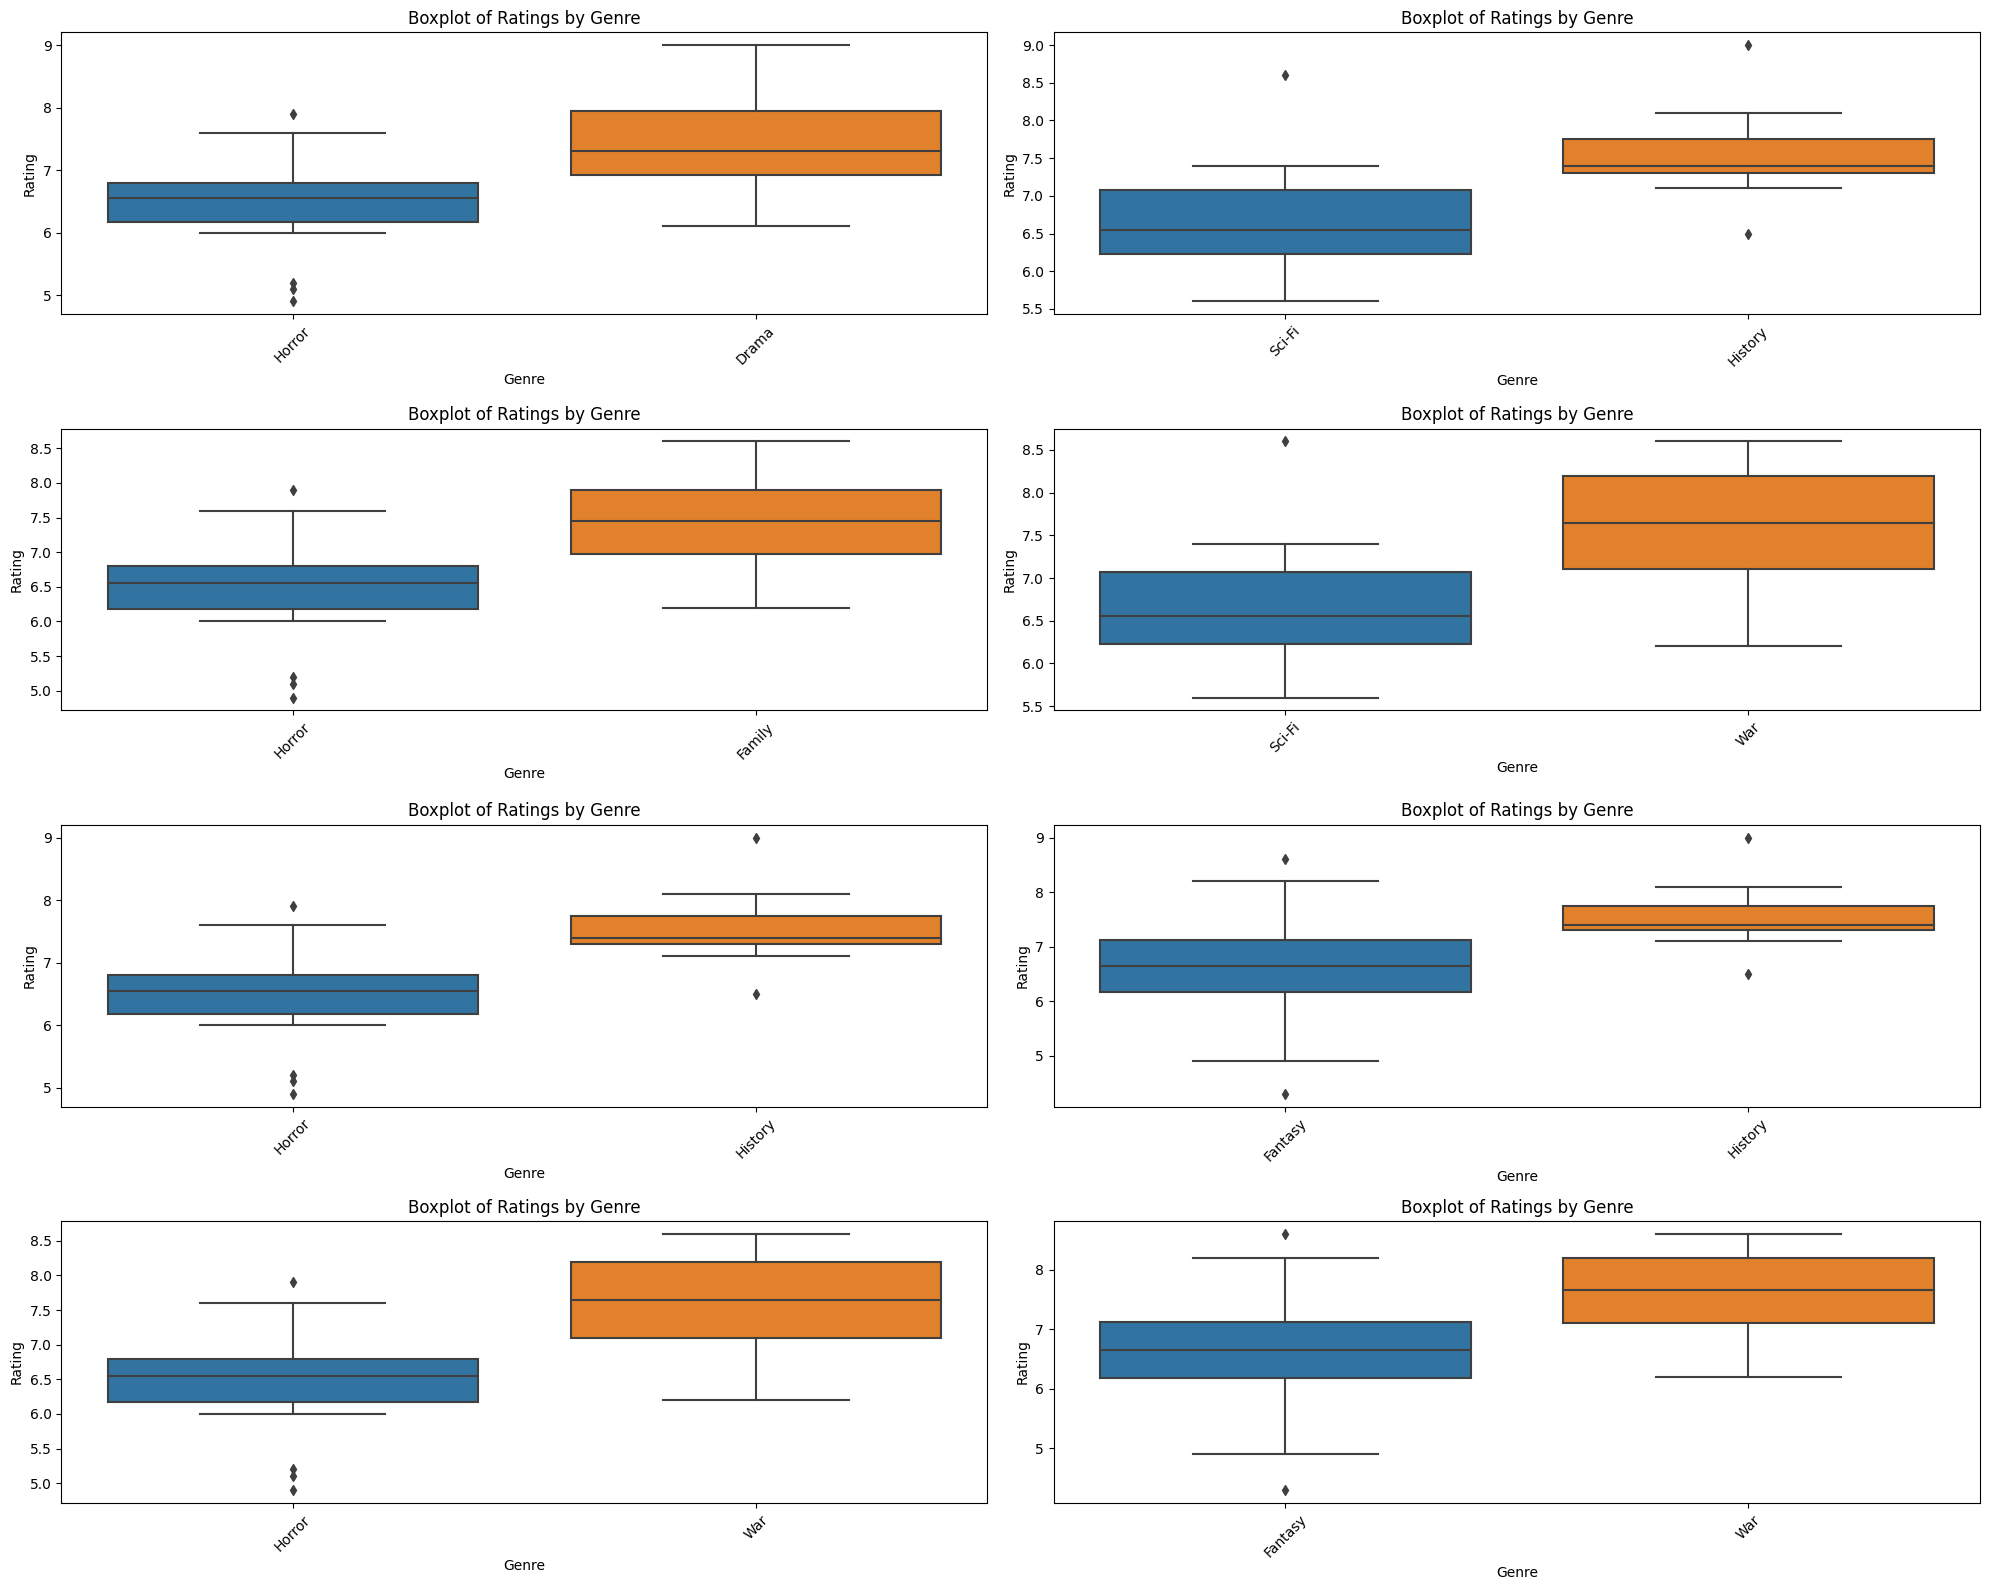

In [31]:
selected_columns1 = ['Horror','Drama']
selected_columns2 = ['Sci-Fi','History']
selected_columns3 = ['Horror','Family']
selected_columns4 = ['Sci-Fi','War']
selected_columns5 = ['Horror','History']
selected_columns6 = ['Fantasy','History']
selected_columns7 = ['Horror','War']
selected_columns8 = ['Fantasy','War']

selected_columns = [selected_columns1,selected_columns2,selected_columns3,selected_columns4,
                    selected_columns5,selected_columns6,selected_columns7,selected_columns8]

# 使用 Seaborn 绘制箱线图
plt.figure(figsize=(20, 16))  # 设置图的大小
for index, item in enumerate(selected_columns):
    plt.subplot(4, 2, index+1)
    sns.boxplot(data=df_sort[item])
    plt.xlabel('Genre')  # 设置 x 轴标签
    plt.ylabel('Rating')  # 设置 y 轴标签
    plt.title('Boxplot of Ratings by Genre')  # 设置图的标题
    plt.xticks(rotation = 45)

# 显示图表
plt.tight_layout()  # 调整子图布局，避免重叠
plt.show()

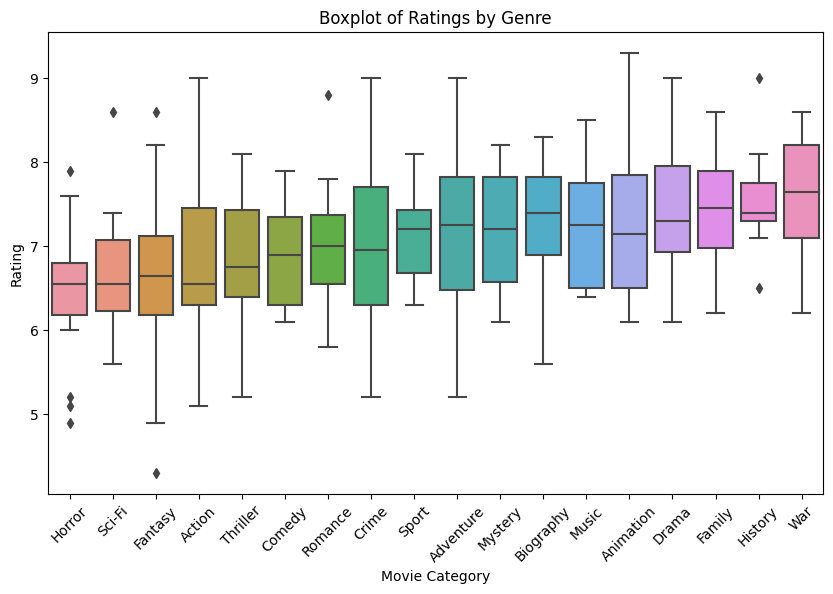

In [32]:
# 将字典数据转换为 DataFrame
df_sample = pd.DataFrame.from_dict(dic_g2rating_sample)

sorted_categories = df_sample.mean().sort_values().index.tolist()
df_sort = df_sample.reindex(columns=sorted_categories)

# 使用 Seaborn 绘制箱线图
plt.figure(figsize=(10, 6))  # 设置图的大小
sns.boxplot(data=df_sort)
plt.xlabel('Movie Category')  # 设置 x 轴标签
plt.ylabel('Rating')  # 设置 y 轴标签
plt.title('Boxplot of Ratings by Genre')  # 设置图的标题
plt.xticks(rotation = 45)
plt.show()

# Visualization

In [39]:
# Get data
data = df['Rating'].value_counts().sort_index(ascending=False)

# Create trace
trace = go.Bar(x = data.index,
               text = ['{:.1f} %'.format(val) for val in (data.values / df.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#000000'),
               y = data.values,
               marker = dict(color = '#db0000'))
# Create layout
layout = dict(title = 'Distribution Of {} Netflix-Ratings'.format(df.shape[0]),
              xaxis = dict(title = 'Rating'),
              yaxis = dict(title = 'Count'))
# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [34]:
# Get data
data = df['Rating'].value_counts().sort_index(ascending=False)

# Create trace
trace = go.Box(y=df['Rating'], name='Rating Distribution', marker=dict(color='#db0000'))

# Create layout
layout = dict(title='Distribution Of {} Netflix-Ratings'.format(len(df)),
              yaxis=dict(title='Rating'))

# Create plot
fig = go.Figure(data=[trace], layout=layout)
fig.show()

In [35]:
# Get data
data = df['Number of Ratings'].value_counts().sort_index(ascending=False)

# Create trace
trace = go.Box(y=df['Number of Ratings'], name='Number of Ratings Distribution', marker=dict(color='#db0000'))

# Create layout
layout = dict(title='Distribution Of {} Netflix-Ratings'.format(len(df)),
              yaxis=dict(title='Rating'))

# Create plot
fig = go.Figure(data=[trace], layout=layout)
fig.show()

In [36]:
# Get data
data = df['Release Date'].value_counts().sort_index(ascending=False)

# Create trace
trace = go.Box(y=df['Release Date'], name='Release Date Distribution', marker=dict(color='#db0000'))

# Create layout
layout = dict(title='Distribution Of {} Netflix-Ratings'.format(len(df)),
              yaxis=dict(title='Rating'))

# Create plot
fig = go.Figure(data=[trace], layout=layout)
fig.show()